# VIMS Cube Visual Interface

## VCVI Doesn't Roll off the Tongue...

This notebook has a simple purpose: reading csv files made from Jcubes and printing out the results. Much of this code was originally created to examine simulation results, but we can used it to examine any cube in theory. One of the goals is to make it so we can view a cube in color with ease. So without further ado... please insert the file to be used.

WARNING: animations exist in this notebook! remember to shut them down before running cells from the top or you might end up with problems! (If you break it, don't worry, resetting the notebook should just do it). 

In [25]:
# COLLECTED CUBES
tester = r"C:\Users\deran\Desktop\CubeCSVDatabase\T114\CM_1826052615_1.cub.csv" #Good Default Test, global view
ontario = r"C:\Users\deran\Desktop\CubeCSVDatabase\T38\CM_1575506843_1.cub.csv" #Ontario Laucus
specular = r"C:\Users\deran\Desktop\CubeCSVDatabase\T85\CM_1721848119_1.cub.csv" #Specular Point
darkOval = r"C:\Users\deran\Desktop\CubeCSVDatabase\T35\CM_1567239055_1.cub.csv" #the mysterious dark oval
sionascaig = r"C:\Users\deran\Desktop\CubeCSVDatabase\T66\CM_1643411453_1.cub.csv" #temperate lake?
selk = r"C:\Users\deran\Desktop\CubeCSVDatabase\T40\CM_1578263500_1.cub.csv" #Crater!
sedi = r"C:\Users\deran\Desktop\CubeCSVDatabase\T69\CM_1654399736_1.cub.csv" #sediment?

In [36]:
%matplotlib notebook

#File insertion goes here.
#Make sure to put the entire file path here. 
#You do not need to specify the axes file, it can be found automatically from this one.

filepath = sedi #use the name of the cube you want in the above cell.

#Now we extract the axes file as well...

axesfp = filepath.removesuffix(".csv") + ".axes.csv"

# Skeleton code nabbed from https://realpython.com/python-csv/

import csv
import math

#Step 1: use the axes to determine the size of what we're dealing with.

xAxis = []
yAxis = []
zAxis = []

with open(axesfp) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        i = 0
        L = len(row)
        while (i < L-1):
            if (line_count == 0):
                xAxis.append(row[i])
            elif (line_count == 1):
                yAxis.append(row[i])
            elif (line_count == 2):
                zAxis.append(row[i])
            i = i+1
        line_count += 1

#We now have an x, y, and z axis. x and y axes are just ordinal, but the z axis contains wavelength in microns.
#The lengths of these arrays tell us how to extract the data.

dataStorage = [[[0 for x in range(len(zAxis))] for x in range(len(yAxis))] for x in range(len(xAxis))] 

#The above holds the data of the cube itself. 

with open(filepath) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < len(xAxis)):
            dataStorage[i][j][k] = float(row[i])
            if (math.isnan(dataStorage[i][j][k])):
                dataStorage[i][j][k] = 0 #We set nans to zero to allow plotting to take place, careful!
            elif (dataStorage[i][j][k] < 0):
                dataStorage[i][j][k] = 0 #Negative values are nonsense.
            elif (dataStorage[i][j][k] > 1):
                dataStorage[i][j][k] = 1 #Make saturation obvious? Keep it from overloading. 
            i = i + 1
        i = 0
        j = j + 1
        if (j >= len(yAxis)):
            j = 0
            k = k + 1
        line_count += 1

#The data is now read in.
#all future programs in this notebook should be able to access xAxis, yAxis, zAxis and dataStorage.
#dataStorage is stored in xyz order, that is x, y, and wavelength. 

#extra imports:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

#helpful declarations
#Wavelength of windows in microns (um)
windowum = [0.933078, 1.08183, 1.27813, 1.59018, 2.01781, 2.69620, 2.79889, 5.00576]
#Now we need to dynamically find the indeces where this is true. 
windowInd = [0,0,0,0,0,0,0,0]
i = 0
while (i < 8):
    j = 0
    while (j < len(zAxis)):
        if (float(zAxis[j]) < windowum[i] and float(zAxis[j+1]) > windowum[i]):
            if (windowum[i] - float(zAxis[j]) < float(zAxis[j+1]) - windowum[i]):
                windowInd[i] = j
                #Have to make sure we pick the closest point, not just the "lower" one.
            else:
                windowInd[i] = j+1
            j = len(zAxis)
        j = j + 1
    i = i+1
print(windowInd)
    
def indexFromWav(wav):
    index = 0
    j = 0
    while (j < len(zAxis)):
        if (float(zAxis[j]) < wav and float(zAxis[j+1]) > wav):
            if (wav - float(zAxis[j]) < float(zAxis[j+1]) - wav):
                index = j
                #Have to make sure we pick the closest point, not just the "lower" one.
            else:
                index = j+1
            j = len(zAxis)
        j = j + 1    
    return index
    
#image dimensions are fungible. Calculate them.  
xDim = 0
yDim = 0
if (len(xAxis) > len(yAxis)):
    yDim = 9 
    xDim = 9/(len(xAxis)/len(yAxis))
else:
    xDim = 9
    yDim = 9/(len(yAxis)/len(xAxis))
#This may seem backward, but transpositions occur so...

    
print(np.amax(dataStorage))
print(np.amin(dataStorage))

[79, 108, 120, 139, 165, 206, 212, 344]
0.17188
0.0


In [7]:
#Little code block for printing things if I want to without reading the whole file again.

#0.933078, 1.08183, 1.27813, 1.59018, 2.01781, 2.69620, 2.79889, 5.00576

#0.08928, 0.90909, 0.72973 (The "bestcolor" options for my algorithm, RGB, from .1 .2 .3)

# for later: https://iopscience.iop.org/article/10.3847/PSJ/aba191/meta

# T94 is missing. Would have been nice too, since it included https://link.springer.com/article/10.1186/s13535-014-0003-4

# thingy https://www.sciencedirect.com/science/article/pii/S0032063309001287 lots of globes.

## Single Image Viewer

### If you only want to look at one very specific slice



<IPython.core.display.Javascript object>


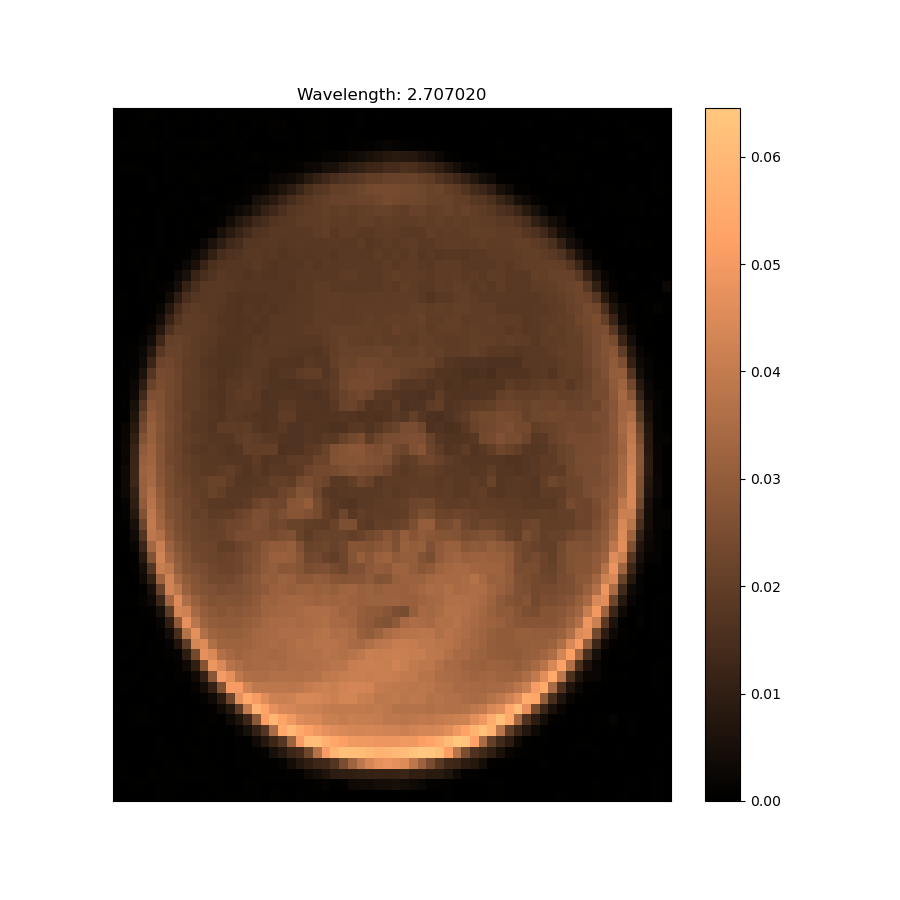

In [8]:
index = 206
#The wavelength we want to use. Indices up to 351 are allowed. 0 is allowed.

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (xDim,yDim))

#Data storage is a 3D array in the wrong order, we need to get a 2D one out of it.
temp = np.transpose(dataStorage) #xyz to zyx
dataShaped = np.transpose(temp[index]) #zyx to yx to xy

image = ax.pcolormesh(dataShaped, cmap="copper")
fig.colorbar(image,ax=ax)
ax.set(xticks=[], yticks=[], title = 'Wavelength: ' + str(zAxis[index])) #Remove ticks.


plt.show()

## Simple Cube Viewer

### Probably the one used most often.

This block simply animates through every wavelength, displaying the image without any funny business.

<IPython.core.display.Javascript object>


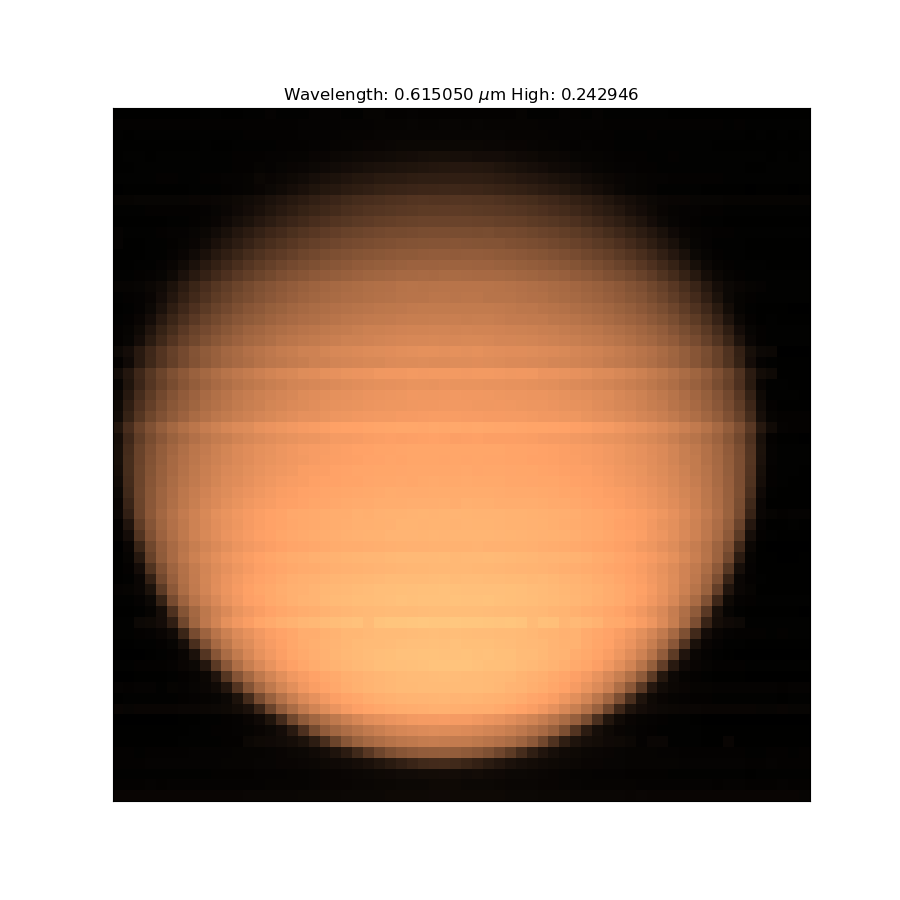

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (xDim,yDim))

#Data storage is a 3D array in the wrong order, we need to get a 2D one out of it.
temp = np.transpose(dataStorage) #xyz to zyx
dataShaped = np.transpose(temp[0]) #zyx to yx to xy

image = ax.pcolormesh(dataShaped, cmap="copper")
ax.set(xticks=[], yticks=[], title = 'INIT') #Remove ticks.

def update(frame):
    ax.clear()
    dataShaped = np.transpose(temp[frame]) #zyx to yx to xy
    image = ax.pcolormesh(dataShaped, cmap="copper")
    ax.set(xticks=[], yticks=[], title = 'Wavelength: ' + str(zAxis[frame]) + ' $\mu$m High: ' + str(np.amax(dataShaped)))
    
ani = animation.FuncAnimation(fig, update, frames=len(zAxis), interval=100)

plt.show()

## Atmospheric Windows Display

### Which Data is Useful?

Okay now we display the windows. This first one is not normalized, every image is on its own. Helps if you end up with one of your windows being horribly glitched and unhelpful.

<IPython.core.display.Javascript object>


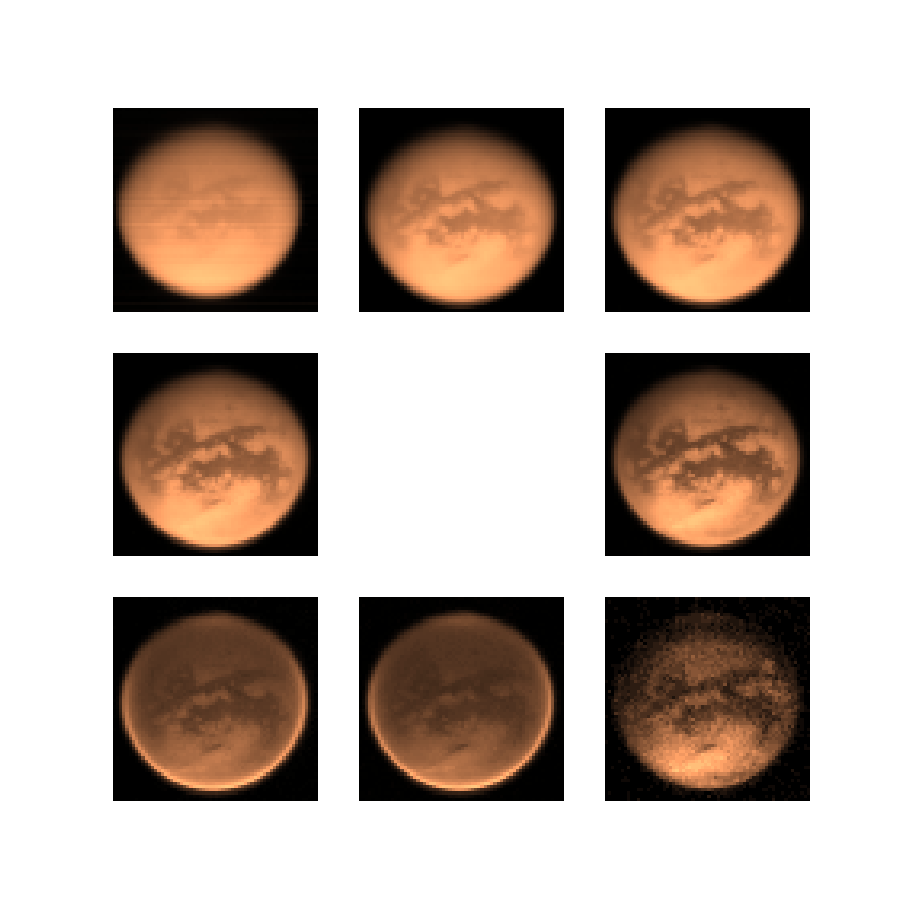

In [10]:

fig, axs = plt.subplots(3,3, figsize = (xDim,yDim)) 

temp = np.transpose(dataStorage)

#Windows are, according to lambertian_wholedisk:
#0.933078, 1.08183, 1.27813, 1.59018, 2.01781, 2.69620, 2.79889, 5.00576



c1 = axs[0,0].pcolormesh(np.transpose(temp[windowInd[0]]), cmap="copper")
c2 = axs[0,1].pcolormesh(np.transpose(temp[windowInd[1]]), cmap="copper")
c3 = axs[0,2].pcolormesh(np.transpose(temp[windowInd[2]]), cmap="copper")
c4 = axs[1,0].pcolormesh(np.transpose(temp[windowInd[3]]), cmap="copper")
c5 = axs[1,2].pcolormesh(np.transpose(temp[windowInd[4]]), cmap="copper")
c6 = axs[2,0].pcolormesh(np.transpose(temp[windowInd[5]]), cmap="copper")
c7 = axs[2,1].pcolormesh(np.transpose(temp[windowInd[6]]), cmap="copper")
c8 = axs[2,2].pcolormesh(np.transpose(temp[windowInd[7]]), cmap="copper")
cax = axs[1,1].inset_axes([0.0, 0.1, 0.5, 1.0])
#fig.colorbar(c4, ax=cax, label='High') 
#fig.tight_layout(pad=1.0)
axs[0,0].axis('off')
axs[0,1].axis('off')
axs[0,2].axis('off')
axs[1,0].axis('off')
axs[1,1].axis('off')
axs[1,2].axis('off')
axs[2,0].axis('off')
axs[2,1].axis('off')
axs[2,2].axis('off')
cax.axis('off')

plt.show()

## Atmospheric Window: Normalized

### Worthwihle Comparisons!

And now we normalize all the images to scale based on the brightest one, so relative brightnesses will matter. 

<IPython.core.display.Javascript object>


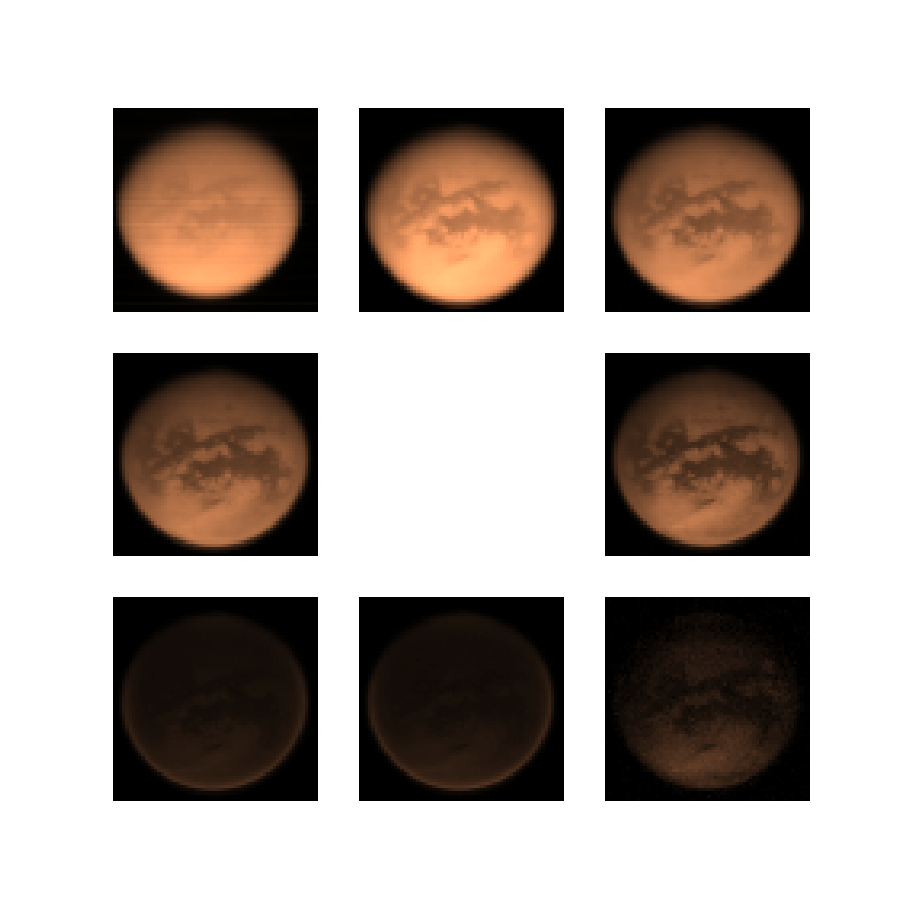

0.259793


In [11]:
fig, axs = plt.subplots(3,3, figsize = (xDim,yDim)) 
temp = np.transpose(dataStorage)

#First, we need to find the maximum of all the data. This will take some finagling.
allData = [temp[windowInd[0]],temp[windowInd[1]],temp[windowInd[2]],temp[windowInd[3]],
          temp[windowInd[4]],temp[windowInd[5]],temp[windowInd[6]],temp[windowInd[7]]]

maximum =  np.amax(allData)
print(maximum)

c1 = axs[0,0].pcolormesh(np.transpose(temp[windowInd[0]]), cmap="copper",vmax=maximum)
c2 = axs[0,1].pcolormesh(np.transpose(temp[windowInd[1]]), cmap="copper",vmax=maximum)
c3 = axs[0,2].pcolormesh(np.transpose(temp[windowInd[2]]), cmap="copper",vmax=maximum)
c4 = axs[1,0].pcolormesh(np.transpose(temp[windowInd[3]]), cmap="copper",vmax=maximum)
c5 = axs[1,2].pcolormesh(np.transpose(temp[windowInd[4]]), cmap="copper",vmax=maximum)
c6 = axs[2,0].pcolormesh(np.transpose(temp[windowInd[5]]), cmap="copper",vmax=maximum)
c7 = axs[2,1].pcolormesh(np.transpose(temp[windowInd[6]]), cmap="copper",vmax=maximum)
c8 = axs[2,2].pcolormesh(np.transpose(temp[windowInd[7]]), cmap="copper",vmax=maximum)
cax = axs[1,1].inset_axes([0.0, 0.1, 0.5, 1.0])
#fig.colorbar(c4, ax=cax, label='High') 
#fig.tight_layout(pad=1.0)
axs[0,0].axis('off')
axs[0,1].axis('off')
axs[0,2].axis('off')
axs[1,0].axis('off')
axs[1,1].axis('off')
axs[1,2].axis('off')
axs[2,0].axis('off')
axs[2,1].axis('off')
axs[2,2].axis('off')
cax.axis('off')

plt.show()

## Color View!

### Let's recreate titancolor2

This produces a single image in three colors according to the titancolor2 color scheme normally used.

We should get images that look like the actual pictures online. Greeeeeen...

RGB correlates to different windows: 5 microns, 2 microns, and 1.3 microns respectively. These correspond to indeces 7 4 and 2 for our windows. 

<IPython.core.display.Javascript object>


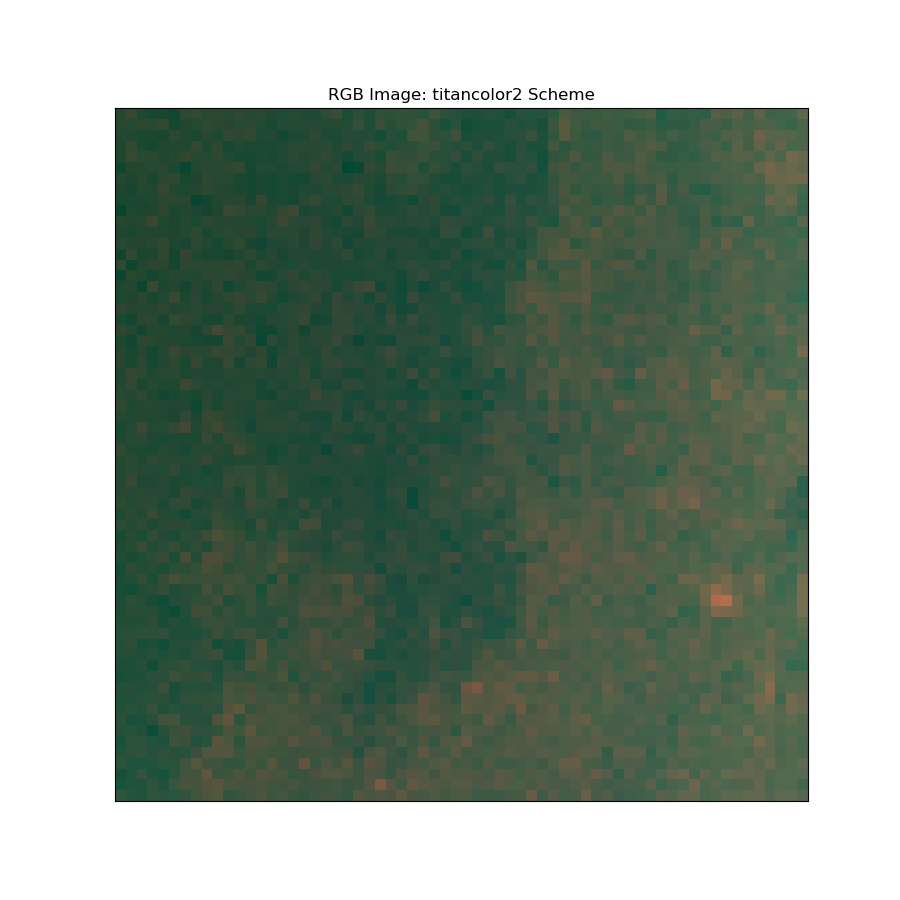

In [37]:
fig, ax = plt.subplots(figsize = (xDim,yDim)) 
temp = np.transpose(dataStorage)

#One of our colors is an average in titancolor2, so we need to grab it::
ave = (temp[336]+temp[337]+temp[338]+temp[339]+temp[340]+temp[341]
      +temp[342]+temp[343]+temp[344]+temp[345]+temp[346]+temp[347]
      +temp[348]+temp[349]+temp[350]+temp[351])/16.

mod = 1.
#For adjusting the overall brightness/saturation

# set R, G, and B
R = ave/(mod*0.07)
G = temp[165]/(mod*0.21)
B = (temp[120]-0.03)/(mod*0.36)
#Note: this was scaled manually, the original numbers in my copy of titancolor2 were wrong.
#Compared with an actual image and dialed until the colors were very close.
#Should replace with real numbers when I have access to those.
#For now it should serve my purposes.

#Saved "defaults". R is changed to 0.12 instead of 1.12 since it looks better.
#R = ave/(mod*0.12)
#G = temp[165]/(mod*0.22)
#B = (temp[120]-0.03)/(mod*0.37)



#B's value can introduce negatives, remove them.
i,j = 0,0
for x in B:
    j=0
    for y in x:
        if (y < 0):
            B[i][j] = 0
        j = j+1
    i = i+1

#These division values were found from titancolor2.
#Apparently we *don't* plot the three at the same intensity.

# Now we need to combine them in the correct form: xyc, that is, x, y, then color value. 
colorData = [R,G,B] # arranged in cyx. I thought RGB needed to be transposed but evidentialy not. Hmm.
colorData = np.transpose(colorData) #arranged in xyc

#Now we need to normalize the colors.
#maximum =  np.amax(colorData)
#print(maximum)
#colorData = colorData / maximum #Sets maximum to 1 for RGB. As it should.
#print(colorData)

#Now we have a problem with there being *negative* values in here for whatever reason. 
#However it appears imshow is handling that automatically.
#Of course, now we ask why there are negative values in the first place...
#They are in the raw data, I checked, so probably noise.

image = ax.imshow(colorData, origin="lower") #origin set since we've transposed one too many times.
ax.set(xticks=[], yticks=[], title = 'RGB Image: titancolor2 Scheme') 

plt.show()

Hang on. 

WHY IS IT BLUE!? 

THIS IS A REAL IMAGE! 

IT SHOULD BE GREEN!

## Alternate Color View

### For when you want to make composite images that are not the standard coloration.

<IPython.core.display.Javascript object>


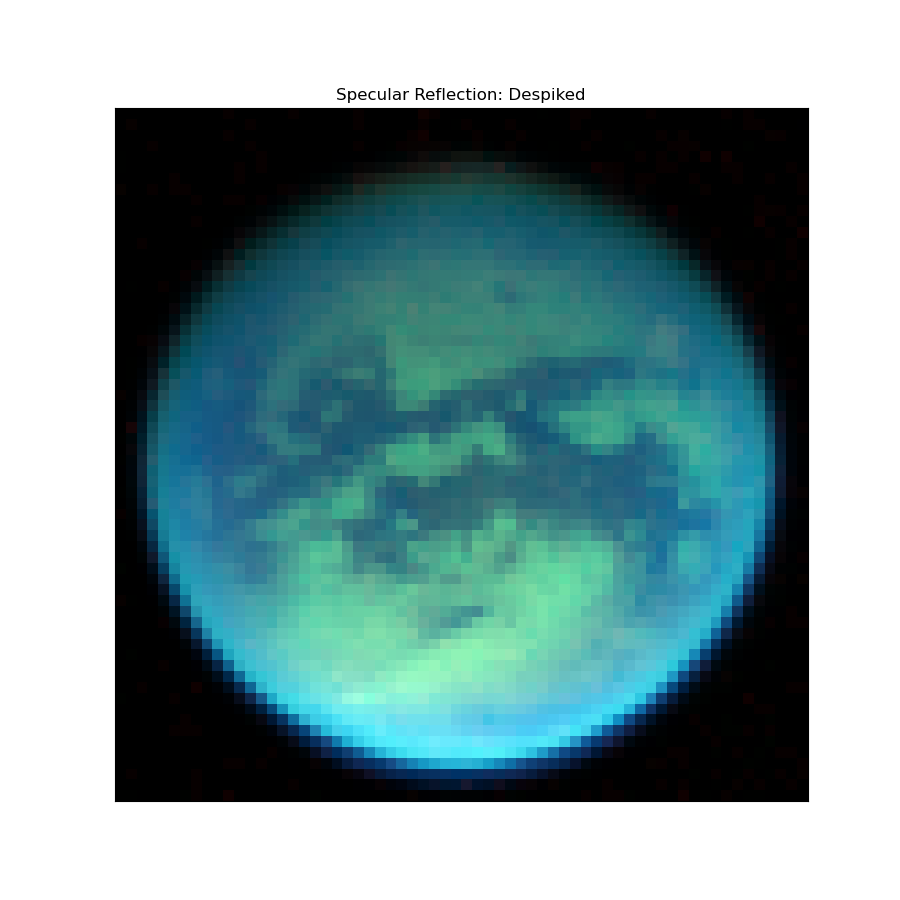

In [17]:
fig, ax = plt.subplots(figsize = (xDim,yDim)) 
temp = np.transpose(dataStorage)

# set R, G, and B
R = temp[indexFromWav(5.)]
G = temp[indexFromWav(2.)]
B = temp[indexFromWav(1.3)]

#Close to titancolor2's bestcolor:
#R = temp[indexFromWav(5.)]
#G = temp[indexFromWav(2.)]
#B = temp[indexFromWav(1.3)]

# Now we need to combine them in the correct form: xyc, that is, x, y, then color value. 
#R = np.transpose(R)
#G = np.transpose(G)
#B = np.transpose(B) # switches xy to yx.
colorData = [R,G,B] # arranged in cyx
colorData = np.transpose(colorData) #arranged in xyc

#Now we need to normalize the colors.
maximum =  np.amax(colorData)
colorData = colorData / maximum #Sets maximum to 1 for RGB. As it should.
#print(colorData)

image = ax.imshow(colorData, origin="lower")
ax.set(xticks=[], yticks=[], title = 'Specular Reflection: Despiked') 

plt.savefig("SpecNoSpike.pdf", format="pdf")

plt.show()

## Color Scheme Randomizer

### For when you don't know what color to do.

Sometimes we dunno what color to set things at. So here's an animation that cycles through random colors, though making sure only one window is used at a time. (We aren't here to look at the atmosphere usually).

<IPython.core.display.Javascript object>


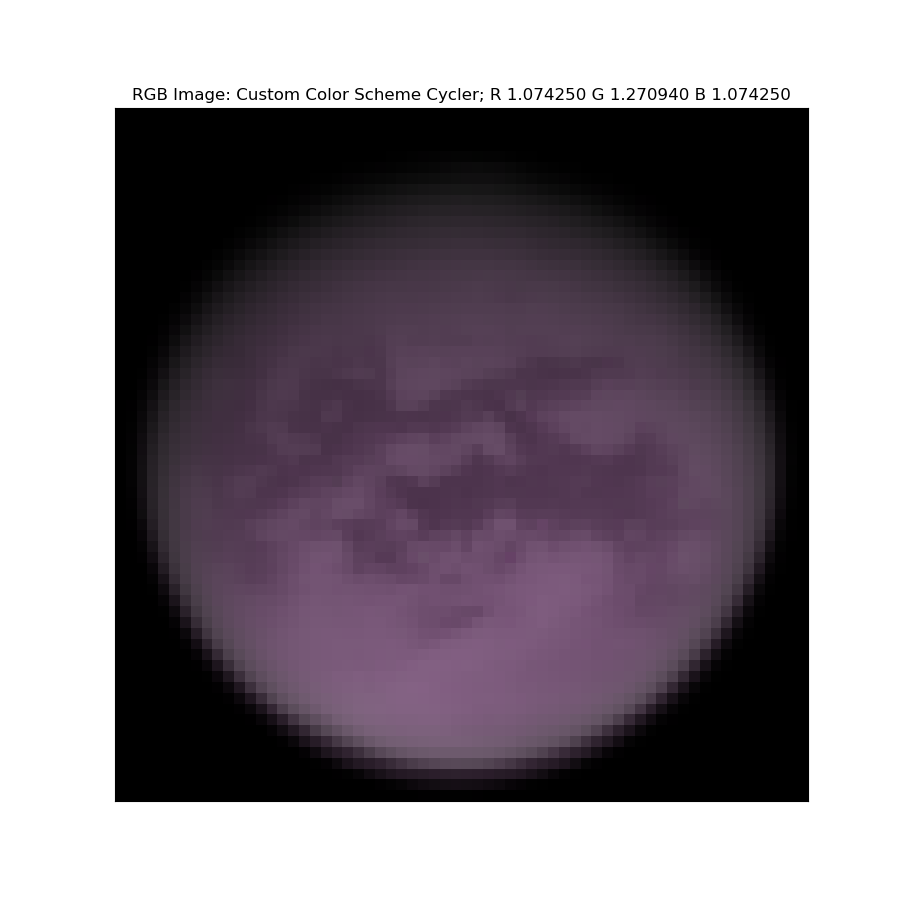

In [18]:
fig, ax = plt.subplots(figsize = (9,9)) #size not dynamic due to long title.
temp = np.transpose(dataStorage)

# set R, G, and B
R = temp[windowInd[2]]/0.5
G = temp[windowInd[1]]/0.5
B = temp[windowInd[0]]/0.5

# Now we need to combine them in the correct form: xyc, that is, x, y, then color value. 
#R = np.transpose(R)
#G = np.transpose(G)
#B = np.transpose(B) # switches xy to yx.
colorData = [R,G,B] # arranged in cyx
colorData = np.transpose(colorData) #arranged in xyc

#Now we need to normalize the colors.
#maximum =  np.amax(colorData)
#colorData = colorData / maximum #Sets maximum to 1 for RGB. As it should.
#print(colorData)

rand1 = random.choice(windowInd)
rand2 = random.choice(windowInd)
rand3 = random.choice(windowInd)
image = ax.imshow(colorData, origin="lower")
ax.set(xticks=[], yticks=[], title = 'RGB Image: Custom Color Scheme Cycler; R ' + 
          str(zAxis[rand1]) + " G " + str(zAxis[rand2]) + " B " + str(zAxis[rand3]))

def update(frame):
    ax.clear()
    rand1 = random.choice(windowInd)
    rand2 = random.choice(windowInd)
    rand3 = random.choice(windowInd)
    R = temp[rand1]/0.5
    G = temp[rand2]/0.5
    B = temp[rand3]/0.5
    colorData = [R,G,B] # arranged in cyx
    colorData = np.transpose(colorData) #arranged in xyc
    image = ax.imshow(colorData, origin="lower")
    ax.set(xticks=[], yticks=[], title = 'RGB Image: Custom Color Scheme Cycler; R ' + 
          str(zAxis[rand1]) + " G " + str(zAxis[rand2]) + " B " + str(zAxis[rand3]))
    
ani = animation.FuncAnimation(fig, update, frames=3, interval=2000)

plt.show()